Dataset shape: (1259, 27)
Dataset columns: Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')
             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   



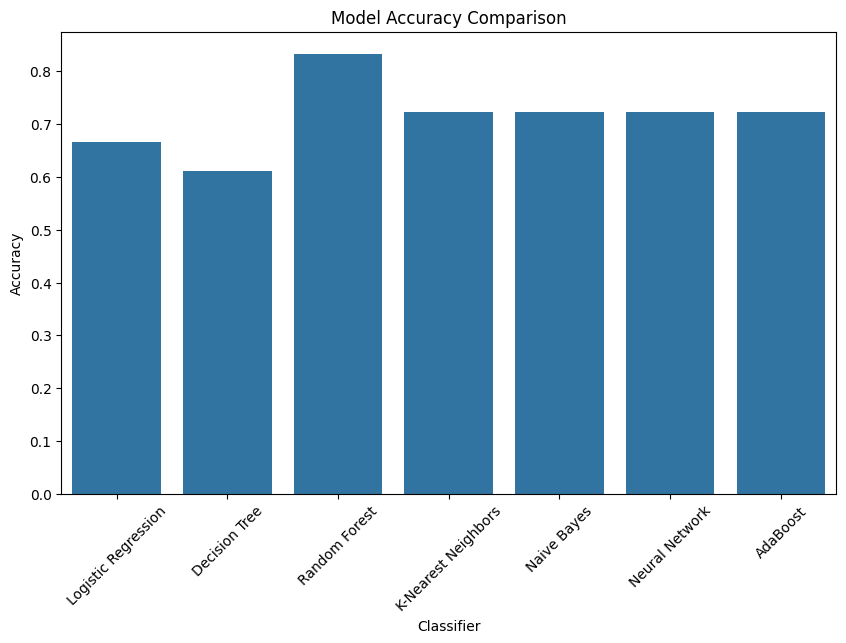


Evaluating Stacking Classifier...
Stacking Classifier Accuracy: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.79      0.92      0.85        12

    accuracy                           0.78        18
   macro avg       0.77      0.71      0.72        18
weighted avg       0.77      0.78      0.76        18

Confusion Matrix:
 [[ 3  3]
 [ 1 11]]
Best parameters found for Random Forest: {'n_estimators': 150, 'min_samples_split': 10, 'max_depth': 20}
Best accuracy score: 0.8675889328063241
Final Model Accuracy: 0.7777777777777778
Final Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.75      1.00      0.86        12

    accuracy                           0.78        18
   macro avg       0.88      0.67      0.68        18
weighted avg       0.83      0.78

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from mlxtend.classifier import StackingClassifier
import warnings

warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/survey.csv')

# Inspect the dataset
print("Dataset shape:", df.shape)
print("Dataset columns:", df.columns)
print(df.head())

# Handle missing data (for illustration, removing rows with missing data)
df.dropna(inplace=True)

# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target variable
X = df.drop('treatment', axis=1)  # Replace 'target_column' with your target variable column name
y = df['treatment']                # Replace 'target_column' with your target variable column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers to test
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=300),
    'AdaBoost': AdaBoostClassifier(),
}

# Train and evaluate each model
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Classifier: {name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

# Display model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

# Stacking Classifier
print("\nEvaluating Stacking Classifier...")
base_learners = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier())
]
stacked_clf = StackingClassifier(classifiers=[clf for _, clf in base_learners], meta_classifier=LogisticRegression())
stacked_clf.fit(X_train, y_train)
y_pred_stack = stacked_clf.predict(X_test)
stack_accuracy = accuracy_score(y_test, y_pred_stack)

print("Stacking Classifier Accuracy:", stack_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))

# Hyperparameter tuning example (Random Forest)
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=3, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found for Random Forest:", random_search.best_params_)
print("Best accuracy score:", random_search.best_score_)

# Final model evaluation
final_model = random_search.best_estimator_
y_final_pred = final_model.predict(X_test)

print("Final Model Accuracy:", accuracy_score(y_test, y_final_pred))
print("Final Model Classification Report:\n", classification_report(y_test, y_final_pred))
print("Final Model Confusion Matrix:\n", confusion_matrix(y_test, y_final_pred))
